## Introduzione


La funzione d'onda $\Psi$ è un oggetto il cui modulo quadro $|\Psi(\vec{r},t)|^2$ ha in ambito fisico un'interpretazione probabilistica. Per questo risulta molto naturale, nel momento in cui si segue un approccio numerica, provare a estrapolare informazioni usando tecniche Monte Carlo.

#### Atomo di idrogeno
La funzione d'onda di un atomo di idrogeno è caratterizzata dai tre numeri quantici $n$, $l$, $m$ e si calcola come:

$$
\Psi_{n,l,m}(r,\theta,\phi)=
\sqrt{\left(\frac{2}{na_0}\right)^3 \frac{(n-l-1)!}{2n[(n+l)!]}}
e^{-r/na_0}\left(\frac{2r}{na_0}\right)^l L_{n-l-1}^{2l+1}\left(\frac{2r}{na_0}\right)
Y_l^m(\theta,\phi)
$$

Dove $a_0=4\pi\epsilon_0\hbar^2/m_e e^2=0.0529$ nm è il raggio di Bohr, $L_{n-l-1}^{2l+1}$ sono i polinomi generalizzati di Laguerre di grado $n-l-1$, $n=1,2,...$ è il numero quantico principale, $l=0,1, ..., n-1$ è il numero quantico azimutale, $m=-l, -l+1, ..., l-1, l$ è il numero quantico magnetico.

Lo stato fondamentale è quindi dato da:
$$
\Psi_{1,0,0}(r,\theta,\phi)=
\frac{a_0^{-3/2}}{\sqrt{\pi}} e^{-r/a_0} 
$$
mentre one dei tre stati 2p è dato da:
$$
\Psi_{2,1,0}(r,\theta,\phi)=
\frac{a_0^{-5/2}}{8}\sqrt{\frac{2}{\pi}} r e^{-r/2a_0} \cos(\theta)
$$


I seguenti valori medi possono essere calcolati in modo analitico:
$$
\left\langle r \right\rangle_{\Psi_{1,0,0}} = \frac{3}{2}a_0
\quad
\left\langle r \right\rangle_{\Psi_{2,1,0}} = 5 a_0
$$
</span>




## Algoritmo Metropolis

Per calcolare i valori medi in modo numerico, questa volta utilizziamo l'algoritmo di Metropolils. In modo schematico l'algoritmo è stato implementato nel seguente modo:

1. Si sceglie in modo arbitrario (non troppo lontano da dove ci aspettiamo di dover campionare maggiormente la distribuzione di probabilità) un punto di partenza $\vec{x}$.
2. Partendo da $\vec{x}$ si fa un salto casuale dato dato da $\Delta \vec{x}= N(\vec{0},s)$. La scelta del parametro è influenzata dal punto 4. Inizialmente avevo anche provato anche con una distribuzione uniforme, e anche in quel caso ottenevo risultati altrettanto buoni.
3. Si accetta il passo con probabilità data da $A(\vec{x}'|\vec{x})=\min\bigg[1,\frac{p(\vec{x}')}{p(\vec{x})}\bigg]$, con $p(\vec{x})=|\Psi(\vec{x})|^2$. In questo modo si accettano tutti i passi verso le regioni a maggiore probabilità, mentre quelli verso zone a probabilità minore sono accettati in modo casuale in base alla loro stessa probabilità.
4. Una buona regola empirica usata per coniugare una veloce convergenza a una correlazione non elevata vuole un tasso di accettazione $\sim$ 50%. Per ottenere tale percentuale è possibile regolare la larghezza della distribuzione che determina la grandezza dei salti.

Questo algoritmo produce quindi un insieme di coordinate che, dopo un periodo di equilibrazione adeguato, risultano campionate da una distribuzione corrispondente a $|\Psi(\vec{x})|^2$.





### Equilibrazione

Prima di equilibrare bisogna scegliere la larghezza del passo $\delta$. In base alle varie situazioni sono state scelti i seguenti parametri, i quali hanno dato tassi di accettazione compresi tra il 45% e il 55% circa.

| $\delta$ | Fondamentale | Eccitato |
|----------|--------------|----------|
| Uniforme | 1.4          | 2.5      |
| Gauss    | 0.8          | 1.7      |

Si è quindi proceduto a equilibrare. Dai seguenti grafici si vede che con circa 150 passi metropolis, dopo un primo massimo iniziale, la oscillazioni si stabilizzano. Consideriamo quindi l'algoritmo equilibrato e procediamo con la simulazione.

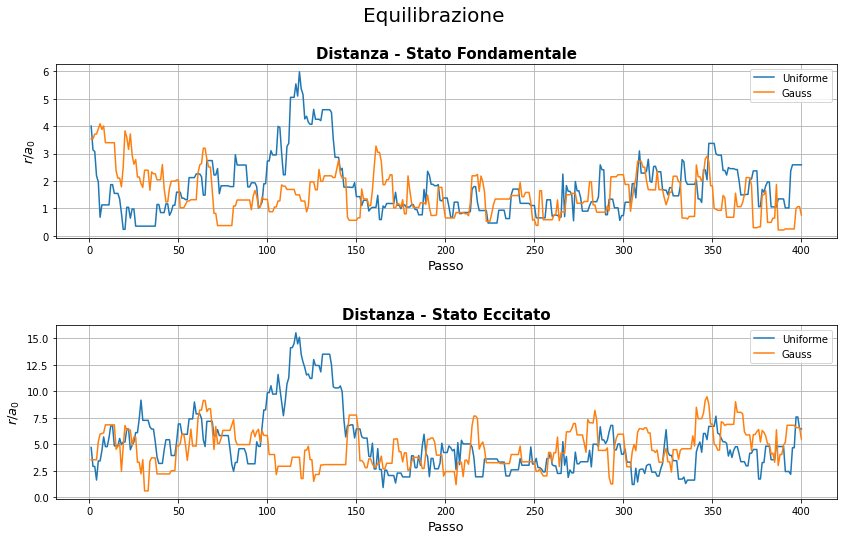

In [34]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

N = 400
x = np.arange(N)+1      # uso l'ordinamento da 1 a N

plt.figure(figsize =(14,8))
plt.suptitle("Equilibrazione", fontsize=20)

plt.subplot(2,1,1)
dist = np.loadtxt("c++/output/outfileGroundEq.txt", usecols=(0), unpack='true')
plt.plot(x, dist, label = "Uniforme")
dist = np.loadtxt("c++/output/outfileGroundEq.txt", usecols=(1), unpack='true')
plt.plot(x, dist, label = "Gauss")
plt.ylabel('$r/a_0$', fontsize=13)
plt.xlabel('Passo', fontsize=13)
plt.grid(True)
plt.title('Distanza - Stato Fondamentale', fontsize=15, fontweight = "bold")
plt.legend()


plt.subplot(2,1,2)
dist = np.loadtxt("c++/output/outfileExcitedEq.txt", usecols=(0), unpack='true')
plt.plot(x, dist, label = "Uniforme")
dist = np.loadtxt("c++/output/outfileExcitedEq.txt", usecols=(1), unpack='true')
plt.plot(x, dist, label = "Gauss")
plt.ylabel('$r/a_0$', fontsize=13)
plt.xlabel('Passo', fontsize=13)
plt.grid(True)
plt.title('Distanza - Stato Eccitato', fontsize=15, fontweight = "bold")
plt.legend()

plt.subplots_adjust(hspace=0.5)

plt.show()

### Simulazione

Fatta l'equilibrazione, possiamo salvare la distanza radiale corrispondente a ogni passo dell'algoritmo Metropolis. Una volta raccolto questo campione di distanze, calcoliamo la media a blocchi. Per questa parte di esercizio è stato considerato un numero di campioni $N_{samples}=10^6$ e un numero di blocchi $N_{blk}=200$.

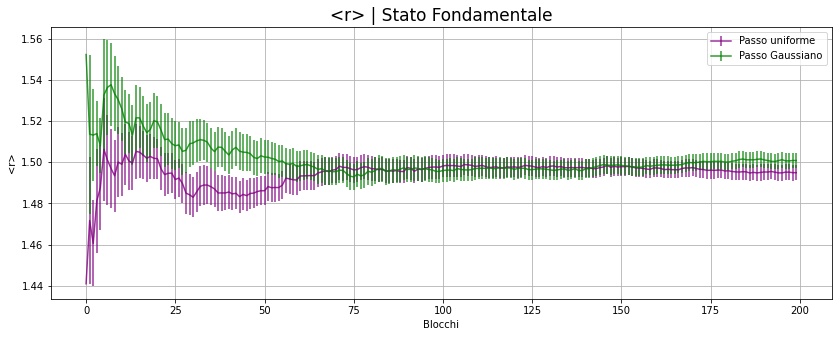

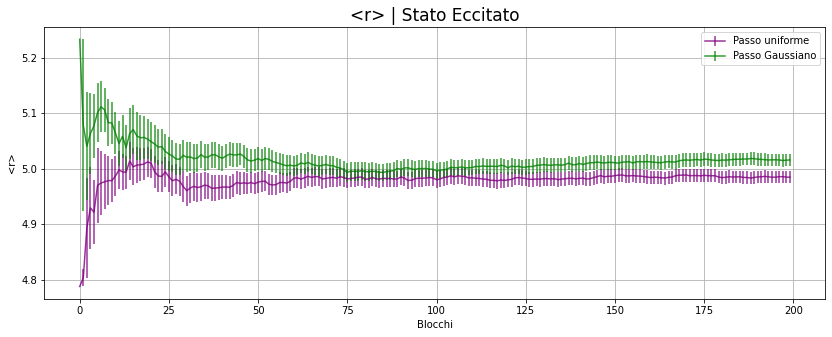

In [36]:
import matplotlib.pyplot as plt
import numpy as np

r100, err100 = np.loadtxt('c++/output/outfileGroundRUn.txt',unpack=True,usecols=(0,1))
r100G, err100G = np.loadtxt('c++/output/outfileGroundRGauss.txt',unpack=True,usecols=(0,1))
r210, err210 = np.loadtxt('c++/output/outfileExcitedRUn.txt',unpack=True,usecols=(0,1))
r210G, err210G = np.loadtxt('c++/output/outfileExcitedRGauss.txt',unpack=True,usecols=(0,1))

x = np.arange(r100.size)

plt.figure(figsize=(14,5))
plt.errorbar(x,r100,yerr=err100,alpha=0.8, label="Passo uniforme", color="purple")
plt.errorbar(x,r100G,yerr=err100G,alpha=0.8, label="Passo Gaussiano",color='green')
plt.title("<r> | Stato Fondamentale", fontsize=17)
plt.xlabel('Blocchi')
plt.ylabel('<r>')
#plt.ylim([0.997,1.002])
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(14,5))
plt.errorbar(x,r210,yerr=err210,alpha=0.8, label="Passo uniforme", color="purple")
plt.errorbar(x,r210G,yerr=err210G,alpha=0.8, label="Passo Gaussiano",color='green')
plt.title("<r> | Stato Eccitato", fontsize=17)
plt.xlabel('Blocchi')
plt.ylabel('<r>')
#plt.ylim([0.997,1.002])
plt.legend()
plt.grid(True)
plt.show()

Non noto una differenza sostanziale tra il campionamento con passo uniformre o gaussiano, i risultati sono compatibili con il valor medio teorico nel limite di $1-1.5\sigma$.

Possiamo quindi visualizzare i punti generati nello spazio tridimensionale. Mostro solamente quelli campionati usando il passo gaussiano:

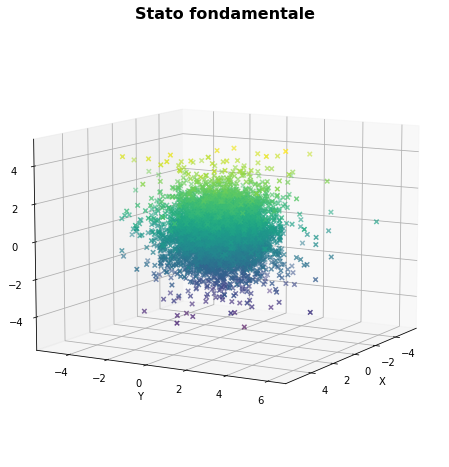

In [53]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

X, Y, Z = np.loadtxt('c++/output/outfileGroundPosGauss.txt',usecols=(0,1,2),unpack=True)

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X, Y, Z, c=Z, marker='x')
ax.view_init(elev=10, azim=30)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Stato fondamentale',fontweight='bold',fontsize=16)

plt.show()

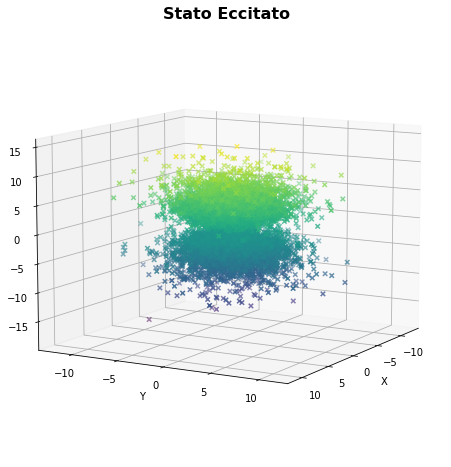

In [52]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

X, Y, Z = np.loadtxt('c++/output/outfileExcitedPosGauss.txt',usecols=(0,1,2),unpack=True)

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X, Y, Z, c=Z, marker='x')
ax.view_init(elev=10, azim=30)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Stato Eccitato',fontweight='bold',fontsize=16)

plt.show()

Nei due grafici si possono apprezzare la simmetria sferica dello stato fondamentale e i due lobi che invece caratterizzano lo stato 2p.